# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
data = '/content/drive/MyDrive/BMLP/clustered_data1.csv'
df = pd.read_csv(data)

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [3]:
from sklearn.model_selection import train_test_split

X = df

y = df['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

**Neural Network (MLPClassifier)**

Algoritma Neural Network yang digunakan dalam kode di atas adalah Multilayer Perceptron (MLP). MLP adalah salah satu tipe dari jaringan saraf buatan yang digunakan untuk klasifikasi, regresi, dan banyak aplikasi pembelajaran mesin lainnya. Model MLPClassifier diimplementasikan melalui kelas MLPClassifier yang tersedia dalam pustaka sklearn.neural_network.

Struktur Model:


*   Lapisan Input: Lapisan pertama adalah lapisan input yang menerima data fitur
dari dataset. Setiap fitur dalam dataset menjadi neuron di lapisan ini. MLPClassifier bekerja dengan menganggap fitur-fitur ini sebagai vektor input untuk jaringan saraf.
*   Lapisan Tersembunyi: MLP memiliki satu atau lebih lapisan tersembunyi yang ada di antara lapisan input dan lapisan output. Setiap neuron di lapisan tersembunyi menerima bobot (weight) dari neuron di lapisan sebelumnya. Dalam kode ini, model menggunakan satu lapisan tersembunyi dengan 100 neuron (ditentukan oleh parameter hidden_layer_sizes=(100,)). Jumlah neuron dalam lapisan tersembunyi dapat diubah tergantung pada kompleksitas masalah. Setiap neuron pada lapisan tersembunyi menghitung sebuah fungsi aktivasi, yang kemudian diteruskan ke lapisan berikutnya. Fungsi aktivasi yang digunakan di sini adalah ReLU (Rectified Linear Unit) secara default, yang membantu jaringan belajar dari data dengan menangani masalah vanishing gradient lebih baik dibandingkan dengan fungsi aktivasi lainnya.
*   Lapisan Output: Lapisan terakhir adalah lapisan output yang menghasilkan hasil prediksi. Setiap neuron di lapisan output mewakili sebuah kelas dalam masalah klasifikasi. Dalam hal ini, MLPClassifier secara otomatis menangani jumlah kelas sesuai dengan label target y yang ada dalam dataset.

Proses Pembelajaran (Training):
*   Proses Pelatihan (Training) dimulai dengan inisialisasi bobot (weights) secara acak.
*   Model akan memperbarui bobot-bobot tersebut selama iterasi untuk meminimalkan kesalahan atau loss. Dalam hal ini, loss function yang digunakan adalah log-loss atau cross-entropy loss, yang mengukur perbedaan antara prediksi model dan label sebenarnya.
*   Proses pembaruan bobot dilakukan menggunakan algoritma backpropagation bersama dengan teknik optimisasi seperti Stochastic Gradient Descent (SGD) atau Adam (tergantung implementasi).
*   Dalam kode ini, max_iter=1000 mengatur batas jumlah iterasi pembelajaran, yang menunjukkan berapa banyak kali algoritma akan memperbarui bobot selama proses pelatihan. Jika model belum konvergen setelah 1000 iterasi, maka pelatihan akan berhenti.

Proses Pengujian (Testing):
Setelah model dilatih dengan data pelatihan, model diuji dengan data uji (test data) menggunakan metode predict(). Model menghasilkan prediksi kelas untuk setiap sampel pada data uji, yang kemudian dibandingkan dengan nilai aktualnya (y_test).

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, log_loss

nn_model = MLPClassifier(hidden_layer_sizes=(100,), random_state=42, max_iter=1, warm_start=True)

nn_train_loss, nn_val_loss = [], []
nn_train_acc, nn_val_acc = [], []

# Training loop
for epoch in range(1, 101):  # Train for 100 iterations
    nn_model.partial_fit(X_train, y_train, classes=np.unique(y_train))

    # Training metrics
    y_train_pred_nn = nn_model.predict(X_train)
    train_acc_nn = accuracy_score(y_train, y_train_pred_nn)
    train_loss_nn = log_loss(y_train, nn_model.predict_proba(X_train))

    # Validation metrics
    y_val_pred_nn = nn_model.predict(X_test)
    val_acc_nn = accuracy_score(y_test, y_val_pred_nn)
    val_loss_nn = log_loss(y_test, nn_model.predict_proba(X_test))

    # Append metrics to list
    nn_train_loss.append(train_loss_nn)
    nn_val_loss.append(val_loss_nn)
    nn_train_acc.append(train_acc_nn)
    nn_val_acc.append(val_acc_nn)

    # Print metrics for the current iteration
    print(f"Iteration {epoch:03d} -> Train Loss: {train_loss_nn:.4f}, Train Accuracy: {train_acc_nn:.4f}, Val Loss: {val_loss_nn:.4f}, Val Accuracy: {val_acc_nn:.4f}")

Iteration 001 -> Train Loss: 2.5603, Train Accuracy: 0.7648, Val Loss: 2.6095, Val Accuracy: 0.7709
Iteration 002 -> Train Loss: 1.3407, Train Accuracy: 0.7400, Val Loss: 1.2866, Val Accuracy: 0.7500
Iteration 003 -> Train Loss: 0.9300, Train Accuracy: 0.7894, Val Loss: 0.8969, Val Accuracy: 0.8004
Iteration 004 -> Train Loss: 0.7647, Train Accuracy: 0.8317, Val Loss: 0.7296, Val Accuracy: 0.8411
Iteration 005 -> Train Loss: 0.6460, Train Accuracy: 0.8506, Val Loss: 0.6162, Val Accuracy: 0.8589
Iteration 006 -> Train Loss: 0.5944, Train Accuracy: 0.8560, Val Loss: 0.5576, Val Accuracy: 0.8617
Iteration 007 -> Train Loss: 0.5580, Train Accuracy: 0.8437, Val Loss: 0.5291, Val Accuracy: 0.8557
Iteration 008 -> Train Loss: 0.4910, Train Accuracy: 0.9189, Val Loss: 0.4771, Val Accuracy: 0.9206
Iteration 009 -> Train Loss: 0.5067, Train Accuracy: 0.9196, Val Loss: 0.4963, Val Accuracy: 0.9195
Iteration 010 -> Train Loss: 0.4105, Train Accuracy: 0.9239, Val Loss: 0.4079, Val Accuracy: 0.9241


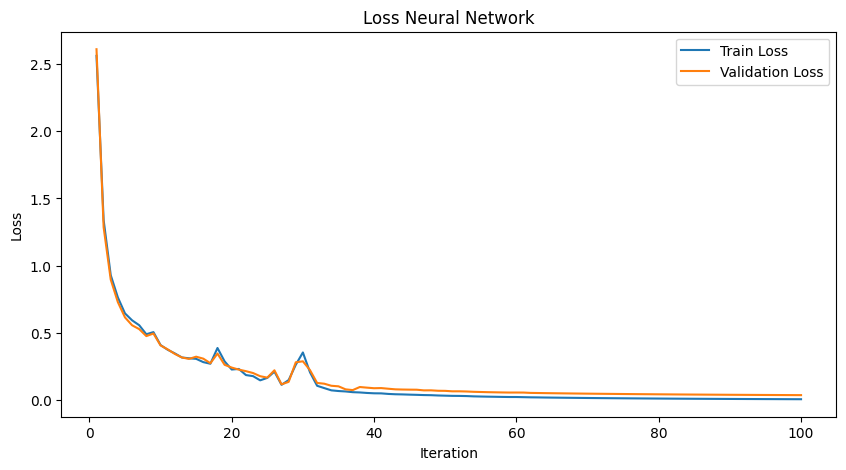

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(nn_train_loss) + 1), nn_train_loss, label='Train Loss')
plt.plot(range(1, len(nn_val_loss) + 1), nn_val_loss, label='Validation Loss')
plt.title('Loss Neural Network')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Random Forest**

adalah algoritma pembelajaran mesin berbasis ensambel yang digunakan untuk klasifikasi dan regresi. Algoritma ini menggabungkan banyak pohon keputusan (decision trees) untuk meningkatkan akurasi dan mengurangi overfitting dibandingkan dengan menggunakan satu pohon keputusan tunggal. Random Forest bekerja dengan prinsip bagging (Bootstrap Aggregating), yang menciptakan beberapa model pembelajaran dan menggabungkan hasil prediksi dari masing-masing model untuk mendapatkan hasil akhir.

Proses Pelatihan:

*   Bootstrap Sampling: Membuat beberapa sampel acak dari dataset asli dengan pengembalian untuk setiap pohon keputusan.
*   Pemilihan Fitur Acak: Pada setiap simpul pohon, memilih subset acak dari fitur untuk menentukan pembagian terbaik.
*   Penentuan Label Kelas atau Nilai: Di daun pohon, model menghasilkan keputusan atau nilai berdasarkan mayoritas kelas (klasifikasi) atau rata-rata nilai (regresi) dari data yang ada di dalamnya.
*   Pembelajaran Pohon Keputusan: Melatih setiap pohon menggunakan subset data yang berbeda, hingga mencapai kedalaman tertentu atau tidak ada pemisahan lebih lanjut.
*   Prediksi: Untuk klasifikasi, hasilnya adalah mayoritas suara dari semua pohon. Untuk regresi, hasilnya adalah rata-rata prediksi semua pohon.

Proses Pengujian (Testing): Setelah model dilatih dengan data pelatihan, model diuji dengan data uji (test data) menggunakan metode predict(). Model menghasilkan prediksi kelas untuk setiap sampel pada data uji, yang kemudian dibandingkan dengan nilai aktualnya (y_test).

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss

# Initialize the Random Forest model with warm_start
rf_model = RandomForestClassifier(n_estimators=1, random_state=42, warm_start=True)

rf_train_loss, rf_val_loss = [], []
rf_train_acc, rf_val_acc = [], []

for epoch in range(1, 101):  # Train for 100 iterations
    rf_model.n_estimators = epoch  # Add 1 tree in each iteration
    rf_model.fit(X_train, y_train)

    # Training metrics
    y_train_pred_rf = rf_model.predict(X_train)
    train_acc_rf = accuracy_score(y_train, y_train_pred_rf)
    train_loss_rf = log_loss(y_train, rf_model.predict_proba(X_train))

    # Validation metrics
    y_val_pred_rf = rf_model.predict(X_test)
    val_acc_rf = accuracy_score(y_test, y_val_pred_rf)
    val_loss_rf = log_loss(y_test, rf_model.predict_proba(X_test))

    # Append metrics to list
    rf_train_loss.append(train_loss_rf)
    rf_val_loss.append(val_loss_rf)
    rf_train_acc.append(train_acc_rf)
    rf_val_acc.append(val_acc_rf)

    # Print metrics for the current iteration
    print(f"Iteration {epoch:03d} -> Train Accuracy: {train_acc_rf:.4f}, Train Loss: {train_loss_rf:.4f}, Val Accuracy: {val_acc_rf:.4f}, Val Loss: {val_loss_rf:.4f}")

Iteration 001 -> Train Accuracy: 0.9965, Train Loss: 0.1278, Val Accuracy: 0.9922, Val Loss: 0.2812
Iteration 002 -> Train Accuracy: 0.9965, Train Loss: 0.0038, Val Accuracy: 0.9943, Val Loss: 0.0199
Iteration 003 -> Train Accuracy: 0.9998, Train Loss: 0.0032, Val Accuracy: 0.9965, Val Loss: 0.0212
Iteration 004 -> Train Accuracy: 1.0000, Train Loss: 0.0026, Val Accuracy: 0.9986, Val Loss: 0.0079
Iteration 005 -> Train Accuracy: 1.0000, Train Loss: 0.0021, Val Accuracy: 0.9989, Val Loss: 0.0060
Iteration 006 -> Train Accuracy: 1.0000, Train Loss: 0.0017, Val Accuracy: 1.0000, Val Loss: 0.0047
Iteration 007 -> Train Accuracy: 1.0000, Train Loss: 0.0018, Val Accuracy: 0.9993, Val Loss: 0.0050
Iteration 008 -> Train Accuracy: 1.0000, Train Loss: 0.0016, Val Accuracy: 1.0000, Val Loss: 0.0042
Iteration 009 -> Train Accuracy: 1.0000, Train Loss: 0.0015, Val Accuracy: 1.0000, Val Loss: 0.0037
Iteration 010 -> Train Accuracy: 1.0000, Train Loss: 0.0014, Val Accuracy: 1.0000, Val Loss: 0.0033


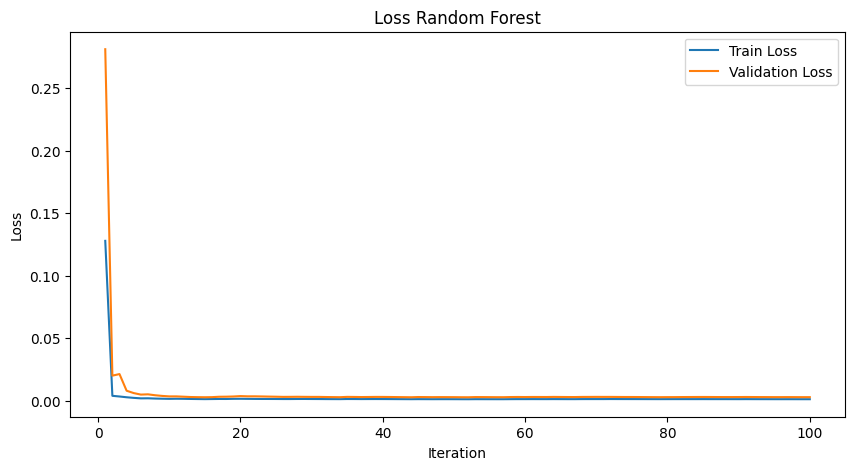

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(rf_train_loss) + 1), rf_train_loss, label='Train Loss')
plt.plot(range(1, len(rf_val_loss) + 1), rf_val_loss, label='Validation Loss')
plt.title('Loss Random Forest')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate Model Neural Network
y_pred_nn = nn_model.predict(X_test)
print("\nClassification Report Neural Network:")
print(classification_report(y_test, y_pred_nn))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_nn))


Classification Report Neural Network:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       255
           1       1.00      1.00      1.00      1648
           2       1.00      1.00      1.00       917

    accuracy                           1.00      2820
   macro avg       1.00      1.00      1.00      2820
weighted avg       1.00      1.00      1.00      2820


Confusion Matrix:
[[ 255    0    0]
 [   0 1648    0]
 [   2    2  913]]


In [9]:
# Evaluate Model Neural Network
y_pred_rf = rf_model.predict(X_test)
print("\nClassification Report Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Classification Report Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       255
           1       1.00      1.00      1.00      1648
           2       1.00      1.00      1.00       917

    accuracy                           1.00      2820
   macro avg       1.00      1.00      1.00      2820
weighted avg       1.00      1.00      1.00      2820


Confusion Matrix:
[[ 255    0    0]
 [   0 1648    0]
 [   0    0  917]]


Neural Network (MLPClassifier):


*   Model Neural Network (NN) memberikan hasil yang sangat baik pada data uji dengan akurasi sempurna 100%. Semua metrik evaluasi, termasuk precision, recall, dan f1-score untuk setiap kelas (0, 1, dan 2), adalah 1.00, menandakan bahwa model ini sangat akurat dalam memprediksi setiap kelas tanpa kesalahan. Confusion matrix menunjukkan bahwa tidak ada kesalahan klasifikasi, meskipun terdapat dua kesalahan kecil pada kelas 2.

Random Forest:


*   Model Random Forest (RF) menunjukkan performa yang identik dengan Neural Network, juga dengan akurasi 100%. Semua metrik evaluasi, seperti precision, recall, dan f1-score untuk setiap kelas, adalah 1.00, yang berarti Random Forest berhasil memprediksi setiap kelas dengan sangat akurat. Confusion matrix dari model ini menunjukkan hasil sempurna, tanpa ada kesalahan prediksi, terutama untuk kelas 0 dan 1.


Kesimpulan:

Kedua model, baik Neural Network maupun Random Forest, menghasilkan akurasi 100% pada data uji, dengan precision, recall, dan f1-score yang identik, yaitu 1.00 untuk semua kelas. Kedua model juga menghasilkan confusion matrix yang sempurna, yang menandakan bahwa semua prediksi untuk kelas 0, 1, dan 2 sangat tepat. Meskipun hasilnya sangat mirip, perbedaan di antara keduanya mungkin terletak pada faktor lain seperti kecepatan pelatihan, kompleksitas model, dan kebutuhan interpretasi, di mana Random Forest sering kali lebih mudah diinterpretasikan dibandingkan Neural Network yang lebih kompleks.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Model Neural Network (MLPClassifier):

Kelemahan:

*   Salah satu kelemahan utama Neural Network adalah kecenderungannya untuk menjadi sangat kompleks dan memerlukan banyak data untuk pelatihan yang efektif. Selain itu, model ini bisa cenderung memakan banyak waktu dalam proses pelatihan jika jumlah fitur atau data sangat besar. Neural Network juga dapat sulit diinterpretasikan karena sifatnya yang berupa "black box".

Model Logistic Regression:

Kelemahan:

*   Meskipun Random Forest cukup mudah diinterpretasikan dan lebih tahan terhadap overfitting, model ini dapat memerlukan waktu yang lebih lama untuk pelatihan dibandingkan model yang lebih sederhana seperti logistic regression. Selain itu, meskipun Random Forest tidak rentan terhadap overfitting, ia dapat menjadi kurang efisien jika jumlah pohon dalam hutan terlalu banyak.

Overfitting atau Underfitting:

Berdasarkan hasil evaluasi yang menunjukkan akurasi 100%, dengan precision, recall, dan f1-score masing-masing 1.00 untuk setiap kelas, dapat disimpulkan bahwa kedua model tidak mengalami overfitting atau underfitting. Model ini dapat memprediksi data dengan sangat akurat, tanpa adanya kesalahan klasifikasi pada data uji. Hal ini menunjukkan bahwa model sudah cukup baik untuk generalisasi pada data yang belum terlihat.

Meskipun begitu, kita harus berhati-hati jika model terlalu "sempurna" pada data uji, karena ini bisa menunjukkan bahwa model mungkin saja terlalu disesuaikan dengan data yang digunakan. Dalam hal ini, kita perlu memverifikasi model menggunakan data yang lebih beragam atau melalui teknik cross-validation untuk memastikan generalisasi model.

Kesimpulan Umum dan Tindakan Lanjutan:

Kedua model, baik Neural Network maupun Random Forest menunjukkan kinerja yang sangat baik pada data uji dengan hasil yang identik, yaitu akurasi 100%. Meskipun tidak ada indikasi overfitting atau underfitting, evaluasi lebih lanjut dengan data yang lebih besar dan beragam, serta menggunakan cross-validation, akan sangat bermanfaat untuk mengkonfirmasi bahwa model ini tidak terlalu disesuaikan dengan data pelatihan. Selain itu, mengingat bahwa kedua model memberikan hasil yang sama baik, pilihan model bisa didasarkan pada kebutuhan praktis. Jika interpretabilitas lebih penting, Random Forest bisa lebih diutamakan, sementara jika performa dalam prediksi lebih penting, Neural Network dapat dipilih. Serta menambahkan lebih banyak data dan fitur yang relevan bisa meningkatkan kemampuan model dalam generalisasi dan memberikan hasil yang lebih baik lagi pada data yang lebih bervariasi.